In [1]:
from sklearn import tree
from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
files = load_files('./avatars', load_content=False)

In [3]:
files.keys()

dict_keys(['filenames', 'target_names', 'target', 'DESCR'])

In [4]:
# labels
files["target"]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [5]:
# folder names
files["target_names"]

['custom', 'default']

In [6]:
def file_to_color_histogram(path):
    
    # open the file with pillow, resize it, normalize
    image = Image.open(path)
    image = image.resize((16, 16))
    image = image.convert("RGB")

    # use numpy to extra an array of pixel data from the image
    data = image.getdata()
    pix = np.array(data)

    # divide each pixel by 32 and round
    pix = pix//32 

    # convert octal numbers to decimal numbers
    multiplier = np.array([8**2, 8**1, 8**0])

    transformed_pixel_values = np.sum(pix*multiplier, axis=1)

    # count number of occurrences of each value in array of non-negative ints
    feature_vector_omg = np.bincount(transformed_pixel_values, minlength=512)

    return feature_vector_omg

In [7]:
# each histogram is an array of 8bits^3 (512 values) corresponding to the 8-bit colors in each image 
# and each element in the array is the count of the number of pixels of that color
histograms = []
for file in files["filenames"]:
    histogram = file_to_color_histogram(file)
    histograms.append(histogram)

In [8]:
histograms[0]

array([14,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  1, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,
        0, 11,  0,  0,  0,  0,  0,  0,  0,  3, 16,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,
        0,  0,  0,  0,  0,  6, 16,  1,  0,  0,  0,  0,  0,  0,  0,  9,  0,
        0,  0,  0,  0,  0

In [9]:
histograms[0].shape

(512,)

In [10]:
# split our histograms and labels into a "training" set and a "validation" set
# use part of our dataset as a "holdout set" during training to get a sense of how it will work on real images

# (sometimes there's a "test" set that's used when you're developing the model to avoid overoptimizing 
# for the validation set, but we're not using it.)

# we'll use half as training, half as validation

# TODO: considering balancing these sets so they have an equal number of default and custom avatars

training_set = histograms[0:len(histograms)//2]
validation_set = histograms[len(histograms)//2:]

labels = files["target"]
training_labels = labels[0:len(labels)//2]
validation_labels = labels[len(labels)//2:]

[len(training_set), len(validation_set), len(training_labels), len(validation_labels)]


[100, 100, 100, 100]

[Text(133.92000000000002, 190.26, 'X[511] <= 67.5\ngini = 0.48\nsamples = 100\nvalue = [40, 60]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(200.88000000000002, 135.9, 'X[438] <= 2.0\ngini = 0.187\nsamples = 67\nvalue = [7, 60]'),
 Text(133.92000000000002, 81.53999999999999, 'X[483] <= 0.5\ngini = 0.032\nsamples = 61\nvalue = [1, 60]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 60\nvalue = [0, 60]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

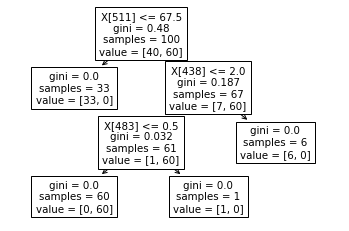

In [11]:
# start with a simple decision tree
# looks at all the data, finds the split that makes one group have most of one label, and another
# group have most of another label

# finds one feature, like the color black. If the number of black pixels is more than 100, that means 80% of 
# the custom images end up in one bucket. 

# (if that is the most discriminating feature that can split that feature into two, it picks that feature))

# find the feature that splits it most coherently into two groups
# then find the second-most splitting feature

# the "feature" in this case will the number of pixels of a specific color
# in this case, likely the gray background of the default avatars

clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_set, training_labels)
tree.plot_tree(clf)

In [14]:
# gini coefficient: goodness measure of how coherent the two groups are (zero is perfect, one (or 0.5?) is useless)
# it's what the decision tree uses to determine how to split

# root node: if index 511 fewer or equal to than 67.5 of that color, split into two groups
# group on the left: 33 custom images and no default images
# group on the right: 7 custom, 60 default

# TODO: write a little function that turns an index into a hex color so we can see what it looks like

# throw all of the validation examples through the tree and see which nodes they end up with
prediction = clf.predict(validation_set[:1])[0]
prediction

1

In [15]:
validation_set[0][511], validation_set[0][438], validation_set[0][475]

(138, 0, 0)

In [16]:
predictions = clf.predict(validation_set)
predictions

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [17]:
# how well did the model do?
np.equal(predictions, validation_labels)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [18]:
# what's our accuracy?
np.mean(np.equal(predictions, validation_labels))

0.96

In [19]:
# try it out on a custom avatar
histogram = file_to_color_histogram("smoke-tests/andreasjansson.png")
prediction = clf.predict([histogram])[0]
prediction

0

In [20]:
# try it out on a default avatar
histogram = file_to_color_histogram("smoke-tests/default.png")
prediction = clf.predict([histogram])[0]
prediction

1